In [188]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [189]:
class AG:
    def __init__(self):
        """
        
        """
        self.TAM_POP = 100
        self.TAM_GENE = 16 # quantidade de livros
        self.TX_CRUZAMENTO = 80
        self.TX_MUTACAO = 10
        self.TX_ELITISMO = 10

        self.pesos = np.array([0.3, 0.125, 0.25, 0.400, 0.05, 0.5, 0.360, 0.210, 0.540, 0.180, 0.344, 0.01, 0.435, 0.25, 0.175, 0.210])

        self.avaliacao = np.zeros(self.TAM_POP) # aptidão
        self.avaliacao_relativa = np.zeros(self.TAM_POP) # porcentagem da aptidão em relação ao todo

        self.POP = np.random.randint(0, 2, (self.TAM_POP, self.TAM_GENE))
        self.POP_AUX = np.zeros((self.TAM_POP, self.TAM_GENE), dtype=int)
        self.tam_pop_aux = 0
        
        self.capacidade = 1.6
        
        self.melhores = []

# Função de avaliação - fitness function

In [190]:
class AG(AG):
    def funcao_objetivo(self):
        """
        
        """
        for posicao, individuo in enumerate(self.POP):
            peso = 0.0
            for i, gene in enumerate(individuo):
                peso += (individuo[i] * self.pesos[i]) 
            
            if peso > self.capacidade:
                self.avaliacao[posicao] = 0.0
            else:
                self.avaliacao[posicao] = peso

# Função de seleção
Implementaremos o método da roleta

In [191]:
class AG(AG):
    def selecao(self):
        return random.randint(0, self.TAM_POP-1)
    
    def metodo_da_roleta(self):
        individuo_selecionado = 0
        aptidao_total = self.avaliacao.sum()
        for posicao, individuo in enumerate(self.POP):
            self.avaliacao_relativa[posicao] = ag.avaliacao[posicao] / aptidao_total

        sorteado = random.random()
        
        area = 0.0
        for i in range(self.TAM_POP):
            area += self.avaliacao_relativa[i]
            if area > sorteado:
                individuo_selecionado = i
                break
        
        return individuo_selecionado
        

# Operadores de cruzamento - crossover
- Cruzamento simples
- Cruzamento com dois pontos de corte
- Cruzamento uniforme ou cruzamento com máscara

## Outros operadores
- Elitismo
- Mutação

In [192]:
class AG(AG):
    # ind1 e ind2 são posições de indivíduos dentro da população (POP)
    def cruzamento_simples(self, ind1, ind2):
        desc1 = np.zeros(self.TAM_GENE, dtype=int)
        desc2 = np.zeros(self.TAM_GENE, dtype=int)

        for i in range(self.TAM_GENE):
            if i < (self.TAM_GENE / 2):
                desc1[i] = self.POP[ind1][i]
                desc2[i] = self.POP[ind2][i]
            else:
                desc1[i] = self.POP[ind2][i]
                desc2[i] = self.POP[ind1][i]

        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1
        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1
        

    def cruzamento_com_dois_pontos(self, ind1, ind2):
        desc1 = np.zeros(self.TAM_GENE, dtype=int)
        desc2 = np.zeros(self.TAM_GENE, dtype=int)

        for i in range(self.TAM_GENE):
            if i < 2 or i > 7:
                desc1[i] = self.POP[ind1][i]
                desc2[i] = self.POP[ind2][i]
            else:
                desc1[i] = self.POP[ind2][i]
                desc2[i] = self.POP[ind1][i]
  
        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1
        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1

    def cruzamento_uniforme(self, ind1, ind2):
        desc1 = np.zeros(self.TAM_GENE, dtype=int)
        desc2 = np.zeros(self.TAM_GENE, dtype=int)

        for i in range(self.TAM_GENE):
            
            if random.randint(0, 1) == 1:
                desc1[i] = self.POP[ind1][i]
                desc2[i] = self.POP[ind2][i]
            else:
                desc1[i] = self.POP[ind2][i]
                desc2[i] = self.POP[ind1][i]

        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1
        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1

    def elitismo(self):
        qtd_individuos = int((ag.TAM_POP * ag.TX_ELITISMO) / 100)
        
        eleitos = (-ag.avaliacao).argsort()[:qtd_individuos]
        for i in range(len(eleitos)):
            self.POP_AUX[self.tam_pop_aux] = self.POP[eleitos[i]]
            self.tam_pop_aux += 1
        
    
    def mutacao(self, ind1):
        desc1 = np.zeros(self.TAM_GENE, dtype=int)
        desc1 = self.POP[ind1]
        gene = random.randint(0, self.TAM_GENE - 1)

        if desc1[gene] == 0:
            desc1[gene] = 1
        else:
            desc1[gene] = 0

        self.POP_AUX[self.tam_pop_aux] = desc1
        self.tam_pop_aux += 1
    
    def substituicao(self):
        self.POP = self.POP_AUX
        
        self.POP_AUX = np.zeros((self.TAM_POP, self.TAM_GENE), dtype=int)
        self.tam_pop_aux = 0

# Critérios de parada
- encontrar a aptidão máxima, ou seja, a carga máxima da mochila;
- contagem por número de gerações;
- interromper o ciclo caso não ocorra a evolução populacional.

In [193]:
class AG(AG):
    def criterios_de_parada(self):
        # Capacidade máxima
        if self.avaliacao.max() == self.capacidade:
            return False
        
        return True

In [194]:
class AG(AG):
    def exibir_melhor_elemento(self, cont):
        melhor = (-ag.avaliacao).argsort()[:1]
        self.melhores.append(self.avaliacao[melhor[0]])
        print("Geração: {} Ind: {} = {}".format(cont+1, self.POP[melhor[0]], self.avaliacao[melhor[0]]))
        

In [195]:
ag = AG()

geracoes = 100
cont = 0
while ag.criterios_de_parada():
    ag.funcao_objetivo()
    ag.exibir_melhor_elemento(cont)
    
    ## Cruzamento
    qtd_cruzamentos = int(((ag.TAM_POP * ag.TX_CRUZAMENTO) / 100)/2) # qtd de cruzamentos

    for i in range(qtd_cruzamentos): 
        ind1 = ag.metodo_da_roleta()
        ind2 = ag.metodo_da_roleta()
        while ind1 == ind2:
            ind2 = ag.metodo_da_roleta()
#         ag.cruzamento_simples(ind1, ind2)
            ag.cruzamento_uniforme(ind1, ind2)
        
    ## fim do cruzamento


    ## Elitismo
    ag.elitismo()
    ## fim do elitismo

    ## Mutação
    qtd_mutacao = int((ag.TAM_POP * ag.TX_MUTACAO) / 100) # qtd de cruzamentos
    for i in range(qtd_mutacao):
        ind1 = ag.metodo_da_roleta()
        ag.mutacao(ind1)
    ## fim da mutação
    
    ag.substituicao() 
    cont += 1

Geração: 1 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 2 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 3 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 4 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 5 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 6 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 7 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 8 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 9 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 10 Ind: [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1] = 1.5839999999999999
Geração: 11 Ind: [1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1] = 1.6


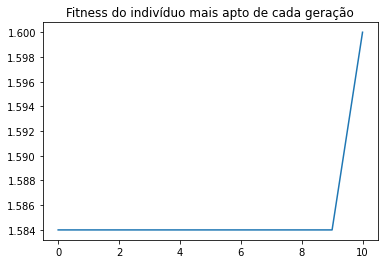

In [196]:
y = np.array(ag.melhores)

plt.plot(y)
plt.title("Fitness do indivíduo mais apto de cada geração")
plt.show()